# Mastering Twitter and Instagram with Python



In this notebook we will see how to master data analysis from social networks.

We will use data from **Twitter**.

## Twitter
Let's see, first of all, how to interact with Twitter through the REST API.

The code you will see is "ready to use", so you can easily use and reuse this notebook with few modifications.

I will use a library, **tweepy**, which will allow us to search for messages that interest us and **pandas** to put our data in quality.

So we don't use the API provided directly by Twitter (it's still possible to do so), but a **wrapper** written and maintained by a community.

In object programming languages, a wrapper is "an object that contains other objects": we build a frame that makes the functions contained in a library available abroad, in an easy way.

Let's go install everything we need for the lab...

*   tweepy (https://github.com/tweepy/tweepy)
*   pandas



In [1]:
!pip install --user tweepy==4.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 5.9 MB/s eta 0:00:00


Let's go import the modules we need for our work:
- numpy
- pandas
- tqdm
- **tweepy**

In [2]:
import tweepy
import numpy as np
import pandas as pd
import pprint
from tqdm import tqdm_notebook as tqdm

First, we have to authorize our "app", we use the keys we generated for this purpose.

We need the four values to authenticate with OAuth2:
- consumer key
- consumer secret
- access token
- access secret
- bearer_token

(specify your **keys**... )

In [3]:
consumer_key = 'k8ZXiOb35VfegVI4IxL9EQCnG'
consumer_secret = 'OmijClg0RSwYS8BV8A0noNjbApMlXhDcIZhzgNieSHuP9dBvYE'

access_token = '1060787090-WS5xMh7tKNY5R1qrDBRP2CMrvlHsETYC5ZkWyoE'
access_token_secret = 'Ha8uQM1HGgOhvs2WCklhfnAZQU3Xixd8VCJ6I1q7e9aFa'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAALlZoAEAAAAA5HSUaz8fXWPY8lwBAtP%2Fe2NUmAo%3DkqBPDvWAidIg9N3nt6cFSQTsnBRScO6LoZQ8fsFpEBmtk7B35C'

client = tweepy.Client( bearer_token=bearer_token,
                        consumer_key=consumer_key,
                        consumer_secret=consumer_secret,
                        access_token=access_token,
                        access_token_secret=access_token_secret,
                        wait_on_rate_limit=True)




The variable **client** is now the starting point for all our operations with **Twitter**.

The **wait_on_rate_limit** parameter enables management of the client-side **rate_limit**. In this way we avoid *being blocked* for too much traffic.


Let’s search Tweets from EU_Eurostat’s Twitter account (@EU_Eurostat)
from the last 7 days (search_recent_tweets).

We exclude Retweets and limit the result to a maximum of 100 Tweets.
We also include some additional information with tweet_fields (author id and when the Tweet was created).


In [4]:
# Define query
query = 'from:EU_Eurostat -is:retweet'

# get max. 100 tweets
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["created_at", "text",
                                                     "source", "context_annotations",
                                                     "author_id"],
                                     user_fields = ["name", "username", "location",
                                                    "verified", "description"],
                                     expansions='author_id',
                                     max_results=100)

Unauthorized: ignored

In [ ]:
first_tweet = tweets.data[0]
dict(first_tweet)

{'id': 1666471995616133120,
 'author_id': 300868924,
 'text': '@serhii_zhuk_22 Please refer to the #StatisticsExplained article for more info: https://t.co/MaCA87eTGM',
 'edit_history_tweet_ids': [1666471995616133120],
 'created_at': datetime.datetime(2023, 6, 7, 15, 47, 39, tzinfo=datetime.timezone.utc)}

In [ ]:
# user information for the first tweet
first_tweet_user = tweets.includes["users"][0]
dict(first_tweet_user)

{'description': 'Eurostat is the statistical office of the European Union. We provide high quality statistics and data on Europe.\nLawful good.\n#AskEurostat',
 'location': 'Luxembourg',
 'verified': False,
 'id': 300868924,
 'name': 'EU_Eurostat',
 'username': 'EU_Eurostat'}

In [ ]:
tweets_data = tweets.data
for tweet in tweets_data[:2]:
    print(tweet["text"])
    if len(tweet["context_annotations"]) > 0:
        pprint.pprint(tweet["context_annotations"])
    print('-----------------------------------------------')

@serhii_zhuk_22 Please refer to the #StatisticsExplained article for more info: https://t.co/MaCA87eTGM
-----------------------------------------------
@serhii_zhuk_22 -one room per pair of single people of the same gender between 12 and 17 years of age; 
- one room per single person between 12 and 17 years of age and not included in the previous category; 
- one room per pair of children under 12 years of age. 
2/2
-----------------------------------------------


Convert tweets to a Pandas dataframe

In [ ]:
tweets.includes

{'users': [<User id=300868924 name=EU_Eurostat username=EU_Eurostat>]}

In [ ]:
import pandas as pd
tweet_info_ls = []
user_info_ls = []

# iterate over each tweet and corresponding user details
for tweet in tweets.data:
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'author_id': tweet.author_id
    }
    tweet_info_ls.append(tweet_info)


for user in tweets.includes["users"]:
    user_info = {
        'author_id': user.id,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    user_info_ls.append(user_info)

tweets_df = pd.DataFrame(tweet_info_ls)
users_df = pd.DataFrame(user_info_ls)

tweets_final_df = tweets_df.merge(users_df, on=["author_id"], how="left")


In [ ]:
len(users_df)

1

In [ ]:
len(tweets_df)

92

In [ ]:
# display the dataframe
tweets_final_df.head()

,created_at,text,source,author_id,name,username,location,verified,description
0,2023-06-07 15:47:39+00:00,@serhii_zhuk_22 Please refer to the #Statistic...,None,300868924,EU_Eurostat,EU_Eurostat,Luxembourg,False,Eurostat is the statistical office of the Euro...
1,2023-06-07 15:47:07+00:00,@serhii_zhuk_22 -one room per pair of single p...,None,300868924,EU_Eurostat,EU_Eurostat,Luxembourg,False,Eurostat is the statistical office of the Euro...
2,2023-06-07 15:46:25+00:00,@serhii_zhuk_22 A person is considered as livi...,None,300868924,EU_Eurostat,EU_Eurostat,Luxembourg,False,Eurostat is the statistical office of the Euro...
3,2023-06-07 15:19:57+00:00,@lukejjg Thanks for getting in touch. Could yo...,None,300868924,EU_Eurostat,EU_Eurostat,Luxembourg,False,Eurostat is the statistical office of the Euro...
4,2023-06-07 15:15:01+00:00,@marit_sandvik Kindly refer to this page on st...,None,300868924,EU_Eurostat,EU_Eurostat,Luxembourg,False,Eurostat is the statistical office of the Euro...


# Search



Let's look for all tweets related to **#AI**
(or you can specify a search to your liking)

We use the bee `.search_recent_tweets` which provides these parameters:
- `query` the query string to submit to Twitter

Let's collect more than 10,000 status and go save them in a list.

In [ ]:
query = '#AI'


tweets_data_total = []
for tweet in tweepy.Paginator(client.search_recent_tweets,
                              query=query,
                              tweet_fields=['context_annotations', "text",
                                            "source", 'created_at', 'author_id',
                                            'public_metrics', 'geo'],
                              #media_fields=['preview_image_url'],
                              #place_fields=['place_type', 'geo'],
                              user_fields = ["name", "username", "location",
                                             "verified", "description"],
                              expansions='author_id',
                              max_results=100,
                              limit=100):
    tweets_data_total.append(tweet)



In [ ]:
len(tweets_data_total)

100

In [ ]:
tweet_info_ls = []
user_info_ls = []

def extract_hash_tags(s):
  return set(part[1:] for part in s.split() if part.startswith('#'))

# iterate over each tweet and corresponding user details
for t in tweets_data_total:
    tweets = t.data
    for tweet in tweets:
      tweet_info = {
          'created_at': tweet.created_at,
          'text': tweet.text,
          'source': tweet.source,
          'author_id': tweet.author_id,
          'retweet_count': tweet.public_metrics["retweet_count"] if 'retweet_count' in tweet.public_metrics else 0,
          'like_count': tweet.public_metrics["like_count"],
          'hashtags': extract_hash_tags(tweet.text)
      }
      tweet_info_ls.append(tweet_info)


for t in tweets_data_total:
    users = t.includes["users"]
    for user in users:
      user_info = {
          'author_id': user.id,
          'name': user.name,
          'username': user.username,
          'location': user.location,
          'verified': user.verified,
          'user_description': user.description
      }
      user_info_ls.append(user_info)

tweets_df = pd.DataFrame(tweet_info_ls)
users_df = pd.DataFrame(user_info_ls)

tweets_final_df = tweets_df.merge(users_df, on=["author_id"], how="left")


In [ ]:
len(tweets_final_df)

25967

In [ ]:
tweets_final_df

,created_at,text,source,author_id,retweet_count,like_count,hashtags,name,username,location,verified,user_description
0,2023-06-07 20:50:18+00:00,RT @ThatSummy: $100 | 24 hours 🥳\n\n• Must ret...,None,1649268330702979078,1335,0,"{PinkBNB, …}",ni bigwin,full_bigwin,BIGWIN,False,"I'm using 2 device, not a multi. Thank youu."
1,2023-06-07 20:50:17+00:00,RT @easya_app: WOW! 300 builders have ALREADY ...,None,517300680,456,0,{},"Konstantin |🛡️⚔️| jerkon.bnb, (o.O)⚪⚫",cherkonz,Moscow,False,@joinmetazeus GameFi on zkSync ⚙️$NOM $JOY @Jo...
2,2023-06-07 20:50:13+00:00,RT @CoinexArabic: اغرق في مشاريع #Web3 الأكثر ...,None,1449844331699974145,12,0,"{Web3, Layer2, Layer1, De…}",idk ✨,gentlvm,None,False,Like the piano in a country where people have ...
3,2023-06-07 20:50:12+00:00,How Zalando uses AI to super-charge personalis...,None,3360091481,0,0,{AI},The Blockchain,TheBlockchain,None,False,Covering news and providing resources on Bitco...
4,2023-06-07 20:50:12+00:00,How Zalando uses AI to super-charge personalis...,None,3360091481,0,0,{AI},The Blockchain,TheBlockchain,None,False,Covering news and providing resources on Bitco...
...,...,...,...,...,...,...,...,...,...,...,...,...
25962,2023-06-07 17:45:05+00:00,RT @MentorSkywalker: A New Sith World. What sh...,None,1501926669707202561,11,0,"{AI, StarWars, FansAreTheFuture}",R2-D2,AstromechR2D2_,With Luke Skywalker,False,“An extremely well-put together little droid. ...
25963,2023-06-07 17:45:05+00:00,"AI is transforming #DataScience, but we must p...",None,933553271129587712,0,1,"{DataManagement, DataSecurity, AI, DataScience,}",Julian Weinberger,Julian_Wein,"San Francisco Bay Area, CA",False,"Field CTO, @ShardSecure | Systems Engineer and..."
25964,2023-06-07 17:45:05+00:00,RT @ThatSummy: $100 | 24 hours 🥳\n\n• Must ret...,None,1585674896733978624,1335,0,"{PinkBNB, …}",GoWin😇,Sumpahbanggarr_,"Kota Batam, Kepulauan Riau",False,"bismillah, semoga ada rezeki disini..aamiin\na..."
25965,2023-06-07 17:45:05+00:00,RT @ThatSummy: $100 | 24 hours 🥳\n\n• Must ret...,None,1585674896733978624,1335,0,"{PinkBNB, …}",GoWin😇,Sumpahbanggarr_,"Kota Batam, Kepulauan Riau",False,"bismillah, semoga ada rezeki disini..aamiin\na..."


In [ ]:
tweets_final_df[tweets_final_df["hashtags"].str.len()>0]["hashtags"]

0                                            {PinkBNB, …}
2                             {Web3, Layer2, Layer1, De…}
3                                                    {AI}
4                                                    {AI}
5                                                    {AI}
                               ...                       
25962                    {AI, StarWars, FansAreTheFuture}
25963    {DataManagement, DataSecurity, AI, DataScience,}
25964                                        {PinkBNB, …}
25965                                        {PinkBNB, …}
25966                                        {PinkBNB, …}
Name: hashtags, Length: 21357, dtype: object

Okay, we have about **30,000** status.

Let's see how we can use them for our analysis. We use, as always, `Pandas`...


In [ ]:
tweets_final_df.to_csv('sc_twitter.csv')

### Hashtag analysis

Let's go pull out the hashtags and try to put them on a list.

In [ ]:
list_hashtag_strings = []
for i, entry in tweets_final_df.iterrows():
    for hashtag in entry["hashtags"]:
        list_hashtag_strings.append(hashtag.strip().lower().replace(' ',','))
list_hashtag_strings[:10]

['pinkbnb', '…', 'web3', 'layer2', 'layer1', 'de…', 'ai', 'ai', 'ai', 'ai']

Let's group the hashtags, move them to a DataFrame and count them by looking for the most common ones.

To do this we use the `groupby` method of pandas.

In [ ]:
hashtag = pd.DataFrame(list_hashtag_strings)
hashtag.columns = ['hashtag']
df_hashtag = hashtag.groupby(['hashtag'])['hashtag'].count().sort_values(ascending=False)
df_hashtag.head(20)


hashtag
ai                        17714
aiart                      2501
machinelearning            1923
artificialintelligence     1785
porn                       1668
pinkbnb                    1614
art                        1495
stablediffusion            1235
chatgpt                    1132
crypto                     1051
…                          1046
bareback                   1013
aop                        1008
pod                        1008
originalimages             1008
aiapparel                  1008
alloverprint               1008
photoai                    1008
printed                    1008
printondemand              1008
Name: hashtag, dtype: int64

We save the results in two files
- the first file will contain the hashtag list
- the second file will contain the relationship between status and hashtag

In [ ]:
df_hashtag.to_csv('sc_hashtag.csv', header=True)

In [ ]:
status_hashtag = []
for status_id, entry in tweets_final_df.iterrows():
    for hashtag in entry['hashtags']:
        status_hashtag.append({'id': status_id, 'hashtag': hashtag.strip().lower()})

In [ ]:
df_status_hashtag = pd.DataFrame(status_hashtag)
df_status_hashtag.set_index(['id','hashtag'])
df_status_hashtag.to_csv('sc_hashtag_status.csv', header=True)

### Wordcloud

Let's try some visualization libraries in **Python**.
One of the most used (and perhaps least useful) ways to display text is WordCloud.

Let's install the `wordcloud` library.

In [ ]:
!pip install --user wordcloud
!pip install --user matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

We create a list of hashtags by concatenating all the elements of the original list and separating them with a space.

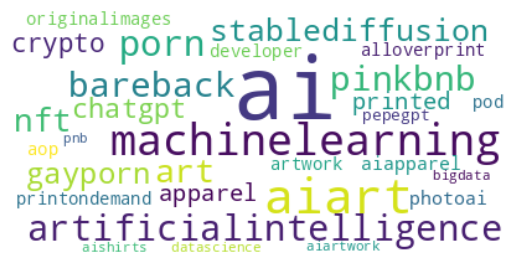

In [ ]:
all_hashtags = ' '.join(list_hashtag_strings)
wordcloud = WordCloud(max_font_size=70, max_words=30,
                      background_color="white",
                      collocations=False).generate(all_hashtags)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Locations



In [ ]:
counts = tweets_final_df.groupby('location').size()
df_location = pd.DataFrame(counts, columns = ['size'])

# we only keep significant cases
df_location = df_location[df_location['size']>3]
df_location = df_location.sort_values(by='size', ascending=False)
df_location.head(10)

,size
location,
Earth,2148
New York,1788
Oregon,1008
"Zurich, Switzerland",705
United States,583
Bunten Barat Madura Jawa Timur,520
"Dhaka, Bangladesh",329
Akure on do state,308
日本,220


<Axes: xlabel='location'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


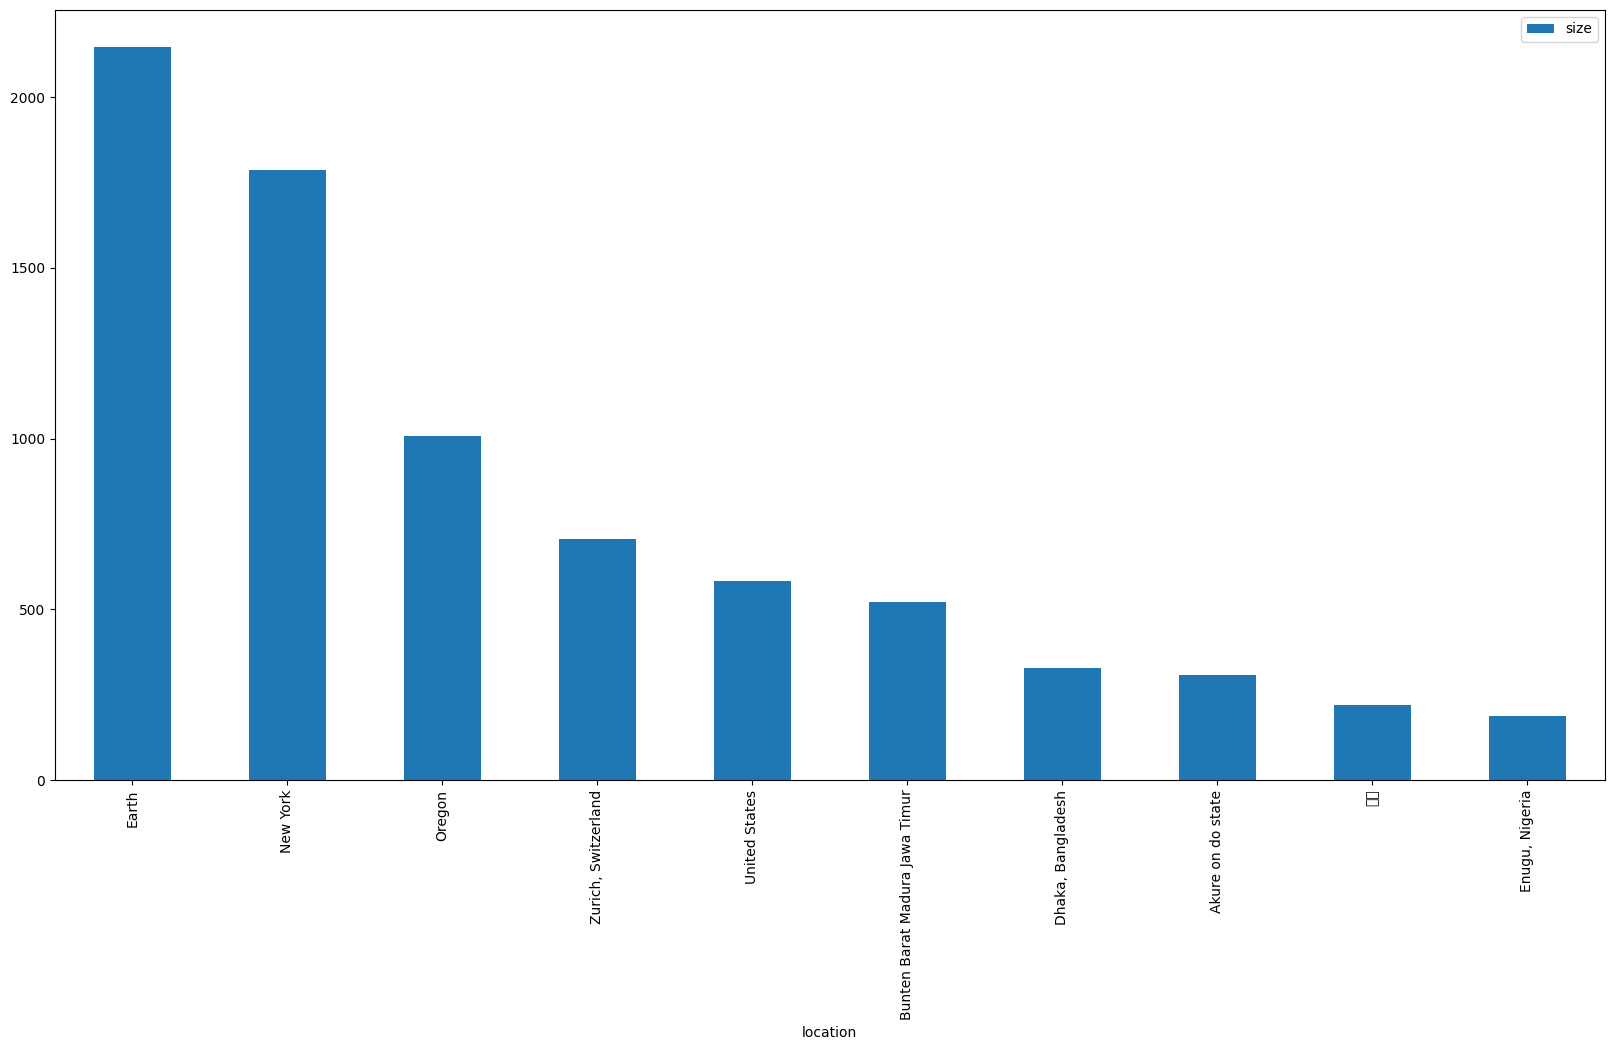

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
df_location.head(10).plot(kind='bar')

### Users

We use the same technique to analyze the **users**.

In [ ]:
tweets_final_df

,created_at,text,source,author_id,retweet_count,like_count,hashtags,name,username,location,verified,user_description
0,2023-06-07 20:50:18+00:00,RT @ThatSummy: $100 | 24 hours 🥳\n\n• Must ret...,None,1649268330702979078,1335,0,"{PinkBNB, …}",ni bigwin,full_bigwin,BIGWIN,False,"I'm using 2 device, not a multi. Thank youu."
1,2023-06-07 20:50:17+00:00,RT @easya_app: WOW! 300 builders have ALREADY ...,None,517300680,456,0,{},"Konstantin |🛡️⚔️| jerkon.bnb, (o.O)⚪⚫",cherkonz,Moscow,False,@joinmetazeus GameFi on zkSync ⚙️$NOM $JOY @Jo...
2,2023-06-07 20:50:13+00:00,RT @CoinexArabic: اغرق في مشاريع #Web3 الأكثر ...,None,1449844331699974145,12,0,"{Web3, Layer2, Layer1, De…}",idk ✨,gentlvm,None,False,Like the piano in a country where people have ...
3,2023-06-07 20:50:12+00:00,How Zalando uses AI to super-charge personalis...,None,3360091481,0,0,{AI},The Blockchain,TheBlockchain,None,False,Covering news and providing resources on Bitco...
4,2023-06-07 20:50:12+00:00,How Zalando uses AI to super-charge personalis...,None,3360091481,0,0,{AI},The Blockchain,TheBlockchain,None,False,Covering news and providing resources on Bitco...
...,...,...,...,...,...,...,...,...,...,...,...,...
25962,2023-06-07 17:45:05+00:00,RT @MentorSkywalker: A New Sith World. What sh...,None,1501926669707202561,11,0,"{AI, StarWars, FansAreTheFuture}",R2-D2,AstromechR2D2_,With Luke Skywalker,False,“An extremely well-put together little droid. ...
25963,2023-06-07 17:45:05+00:00,"AI is transforming #DataScience, but we must p...",None,933553271129587712,0,1,"{DataManagement, DataSecurity, AI, DataScience,}",Julian Weinberger,Julian_Wein,"San Francisco Bay Area, CA",False,"Field CTO, @ShardSecure | Systems Engineer and..."
25964,2023-06-07 17:45:05+00:00,RT @ThatSummy: $100 | 24 hours 🥳\n\n• Must ret...,None,1585674896733978624,1335,0,"{PinkBNB, …}",GoWin😇,Sumpahbanggarr_,"Kota Batam, Kepulauan Riau",False,"bismillah, semoga ada rezeki disini..aamiin\na..."
25965,2023-06-07 17:45:05+00:00,RT @ThatSummy: $100 | 24 hours 🥳\n\n• Must ret...,None,1585674896733978624,1335,0,"{PinkBNB, …}",GoWin😇,Sumpahbanggarr_,"Kota Batam, Kepulauan Riau",False,"bismillah, semoga ada rezeki disini..aamiin\na..."


In [ ]:
counts = tweets_final_df.groupby('username').size()
df_user = pd.DataFrame(counts, columns = ['size'])

df_user = df_user[df_user['size']>3]
df_user = df_user.sort_values(by='size', ascending=False)
df_user.head(10)

,size
username,
cody_essar44661,1008
MilfBreed,756
AIRobotPorn,729
dilf_breeder,729
RobotPornAI,729
emojizedcom,702
RobotAIPorn,676
bs_totti,644
meskhieyan,520


<Axes: ylabel='username'>

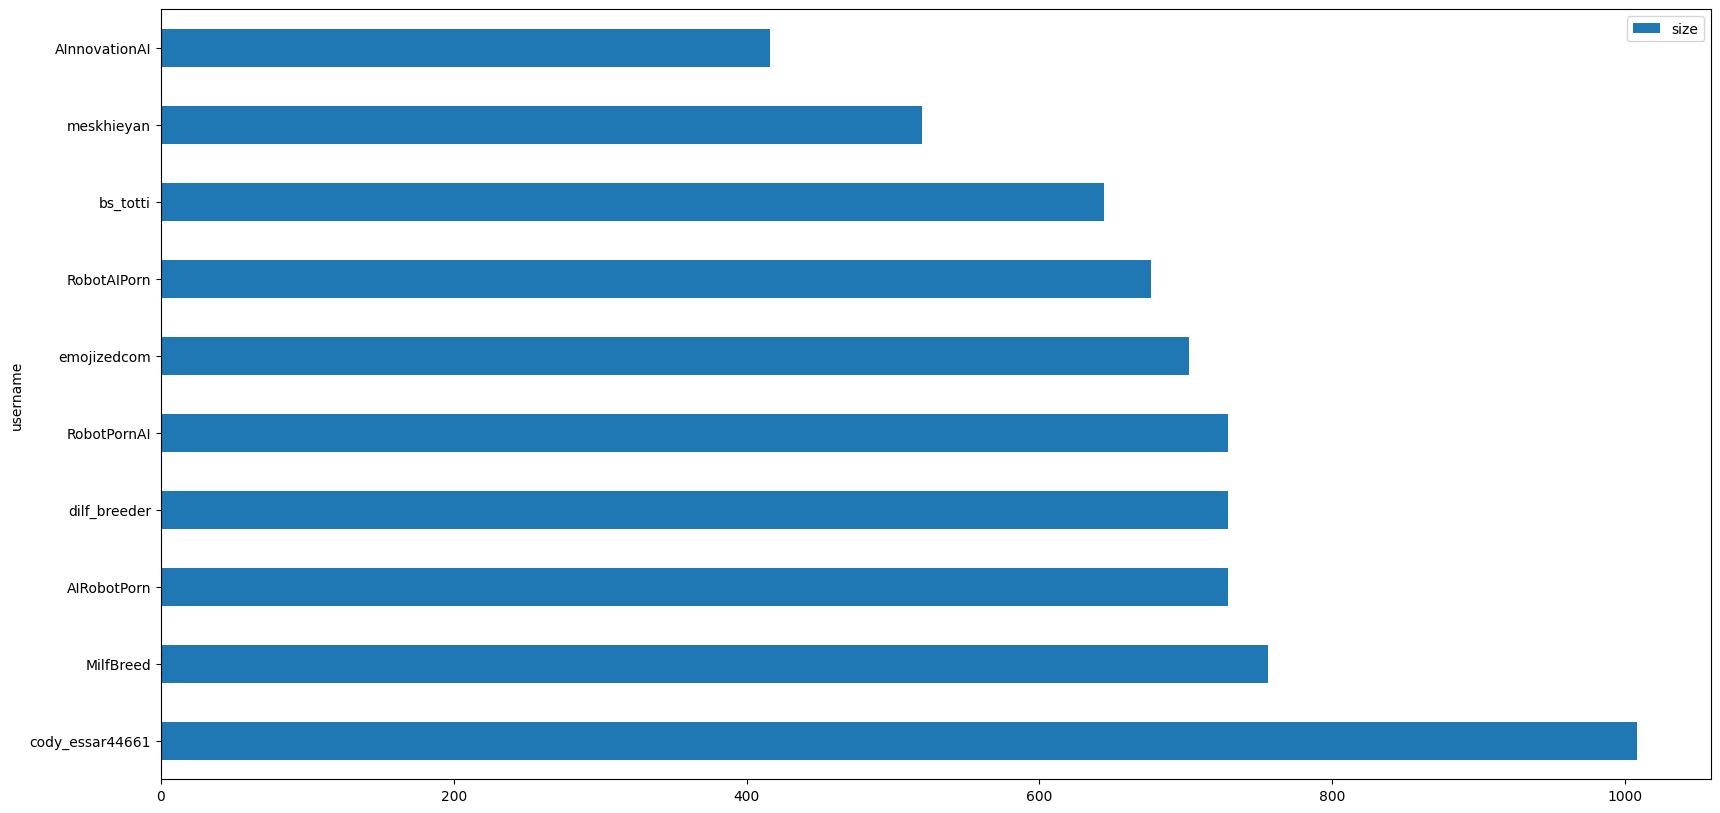

In [ ]:
df_user.head(10).plot(kind='barh')